In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv("data/data_merged.csv", low_memory=False)
raw_df = pd.read_csv("data/data_raw.csv", low_memory=False, header=[0, 1])

In [3]:
interested_years = merged_df.loc[merged_df["questionnaire_login_year_group_name"].isin(["Year 9", "Year 10", "Year 11", "Year 12"])]

In [17]:
# find columns that are relevant to overall wellbeing

terms = [
    "quality",
    "stress",
    "fitness",
    "confident",
    "happy",
    "well"
]

def terms_in(column):
    return any(list(map(lambda term: term in column.lower(), terms)))

matching_columns = [column for column in interested_years.columns if terms_in(column)]

In [18]:
matching_columns

['How much do you agree or disagree with the following statements?_Pupils/students behave well in the dining area',
 'How much do you agree or disagree with the following statements?_Do pupils/students behave well in the dining area?',
 'What after-school club(s) would you like school to offer?_I am happy with the sports club(s) my school offers',
 'What active/sports club(s) at break/lunch time would you like school/college to offer?_I am happy with the active/sports club(s) my school/college offers',
 'How often do you feel the following?_Happy',
 'How often do you feel the following?_Confident',
 'How well do you think you cope with feeling the following?_Sad or upset',
 'How well do you think you cope with feeling the following?_Bad tempered or angry',
 'How well do you think you cope with feeling the following?_Stressed or anxious',
 'How well do you think you cope with feeling the following?_How happy do you feel about the number of good friends you have?',
 'How well do you thin

<Axes: xlabel='How much do you agree or disagree with the following statements?_Pupils/students behave well in the dining area'>

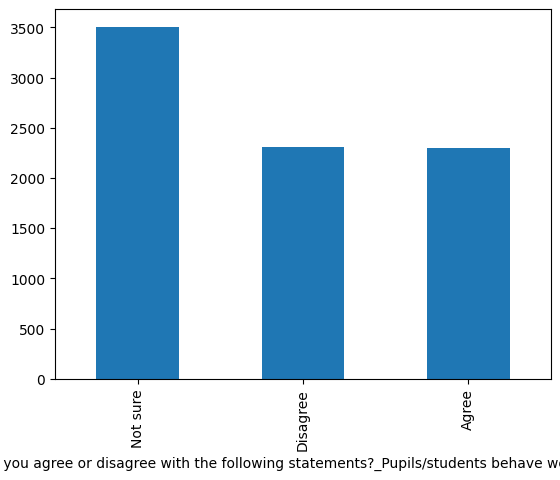

In [26]:
interested_years["How much do you agree or disagree with the following statements?_Pupils/students behave well in the dining area"].value_counts().plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Sad or upset'>

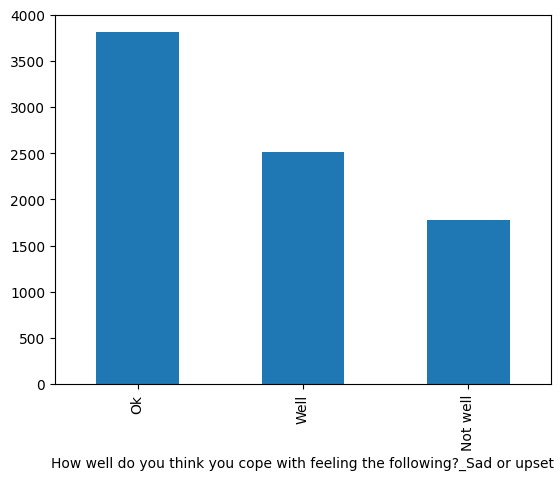

In [27]:
interested_years["How well do you think you cope with feeling the following?_Sad or upset"].value_counts().plot.bar()

<Axes: xlabel="How good do you think your school/college are at dealing with the following '..?_People from different backgrounds not getting on well">

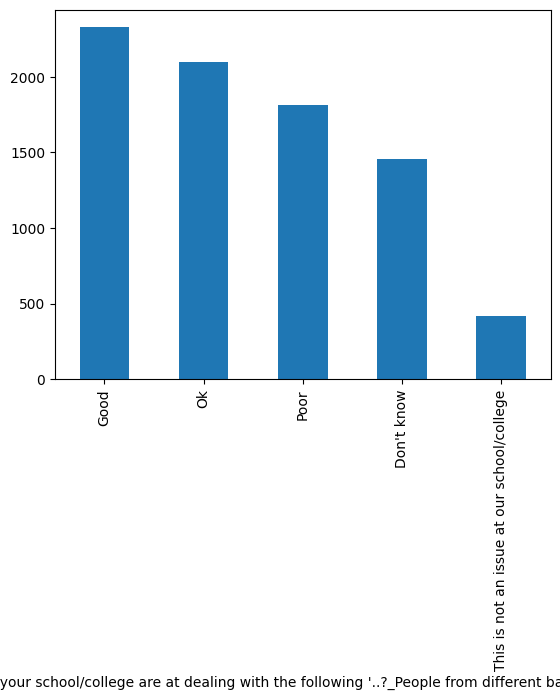

In [31]:
interested_years["How good do you think your school/college are at dealing with the following '..?_People from different backgrounds not getting on well"].value_counts().plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Bad tempered or angry'>

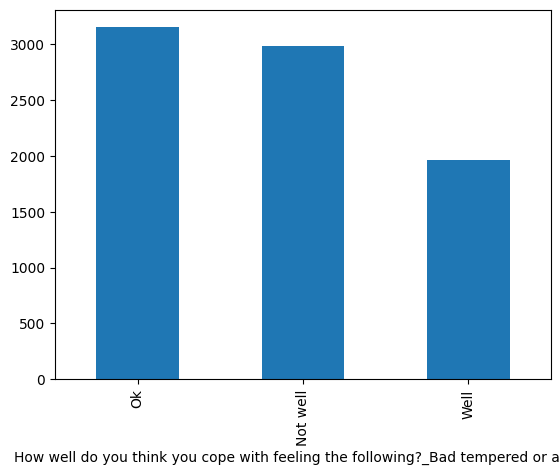

In [33]:
interested_years["How well do you think you cope with feeling the following?_Bad tempered or angry"].value_counts().plot.bar()

In [38]:
groups_by_year  = interested_years.groupby("questionnaire_login_year_group_name").apply(lambda x: x["How well do you think you cope with feeling the following?_Stressed or anxious"])


C:\Users\localuser\AppData\Local\Temp\ipykernel_7792\1751747500.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groups_by_year  = interested_years.groupby("questionnaire_login_year_group_name").apply(lambda x: x["How well do you think you cope with feeling the following?_Stressed or anxious"])


In [43]:
year_9 = groups_by_year["Year 9"]
year_10 = groups_by_year["Year 10"]
year_11 = groups_by_year["Year 11"]
year_12 = groups_by_year["Year 12"]

<Axes: xlabel='How well do you think you cope with feeling the following?_Stressed or anxious'>

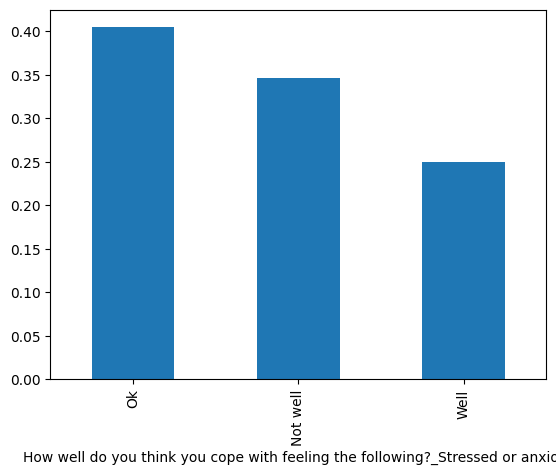

In [52]:
year_9.value_counts(normalize=True).plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Stressed or anxious'>

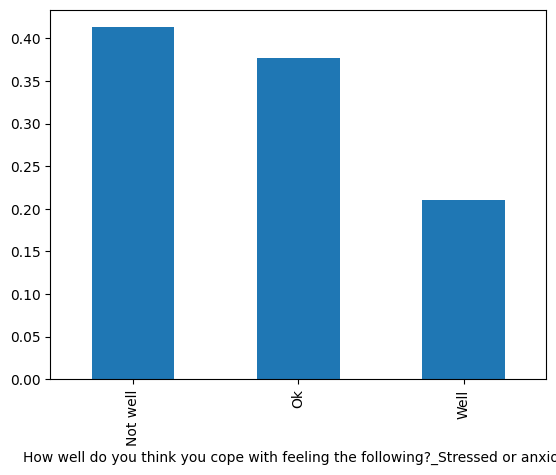

In [53]:
year_10.value_counts(normalize=True).plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Stressed or anxious'>

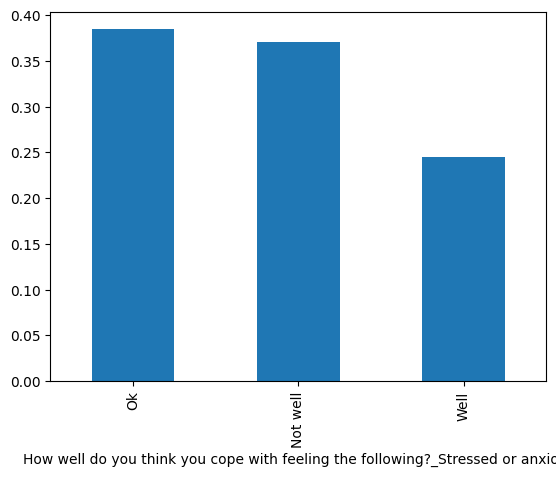

In [54]:
year_11.value_counts(normalize=True).plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Stressed or anxious'>

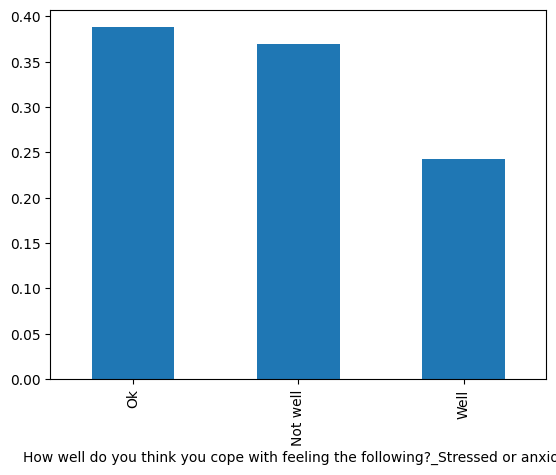

In [55]:
year_12.value_counts(normalize=True).plot.bar()

In [62]:
years = ["Year 9", "Year 10", "Year 11", "Year 12"]
managing_stress_ok_over_years = []
managing_stress_not_well_over_years = []
managing_stress_well_over_years = []

for year in years:
    managing_stress_ok_over_years.append(groups_by_year[year].value_counts(normalize=True)["Ok"])
    managing_stress_not_well_over_years.append(groups_by_year[year].value_counts(normalize=True)["Not well"])
    managing_stress_well_over_years.append(groups_by_year[year].value_counts(normalize=True)["Well"])

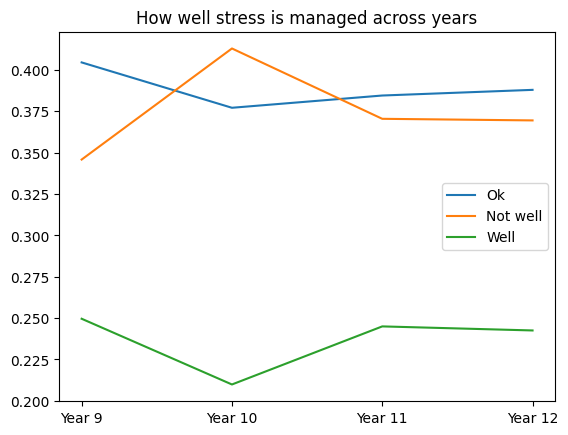

In [72]:
plt.title("How well stress is managed across years")
plt.plot(years, managing_stress_ok_over_years, label="Ok")
plt.plot(years, managing_stress_not_well_over_years, label="Not well")
plt.plot(years, managing_stress_well_over_years, label="Well")
plt.legend()
